In [9]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from jupyterthemes import jtplot
jtplot.style(theme = "monokai",context = "notebook", ticks = True,grid = False)

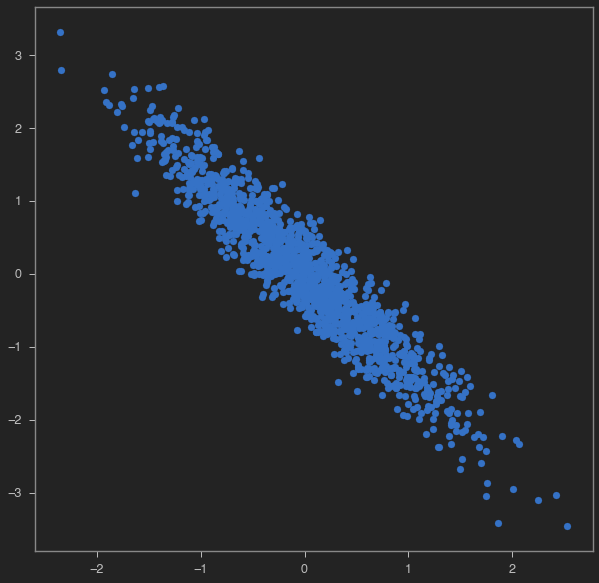

In [198]:
#Blob Dataset
n=1500
X, y = datasets.make_blobs(n_samples=n, random_state=8,centers=1,cluster_std=[0.75])
plt.figure(figsize=(10,10))
X = StandardScaler().fit_transform(X)
transformation = [[0.6, -0.6],[-0.4, 0.8]]
X = np.dot(X, transformation)
plt.scatter(X[:,0],X[:,1])

Covariance Matrix:
 [[ 0.51342678 -0.67007347]
 [-0.67007347  0.98682688]]
[[-0.81641741 -0.57746221]
 [ 0.57746221 -0.81641741]]
Max EigenValue: [ 0.57746221 -0.81641741]
[0.03947547 1.4607782 ]


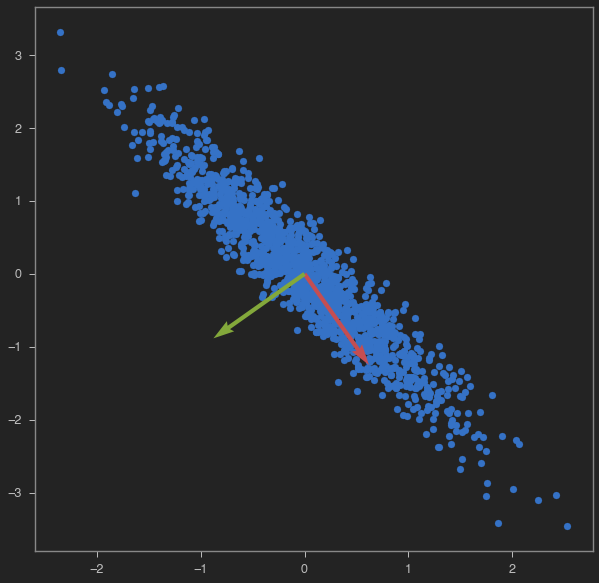

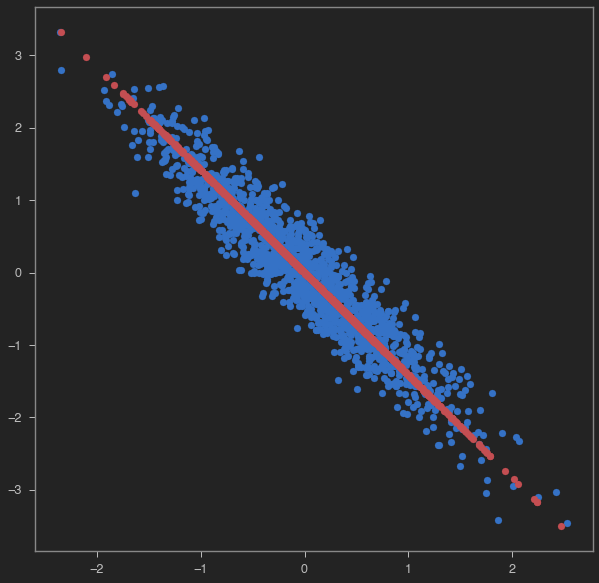

In [200]:
#PCA for blob dataset
cov = np.cov(X.T)
print("Covariance Matrix:\n",cov)
eig_vals, eig_vecs = np.linalg.eig(cov)
eig_vecs = eig_vecs.T
eigen_values_sorted = np.argsort(eig_vals)
max_eig = eigen_values_sorted[1]
min_eig = eigen_values_sorted[0]
print(eig_vecs)
print("Max EigenValue:",eig_vecs[max_eig])
print(eig_vals)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1])
plt.quiver([0,0],[0,0], eig_vecs[max_eig,:],eig_vecs[min_eig,:],color=['r','g'],scale=5)
#Projection
plt.figure(figsize=(10,10))
proj = np.dot(X,eig_vecs[max_eig,:])
proj = np.reshape(proj,(1500,1))
X_new = proj*eig_vecs[max_eig,:]
plt.scatter(X[:,0],X[:,1])
plt.scatter(X_new[:,0],X_new[:,1],c='r')

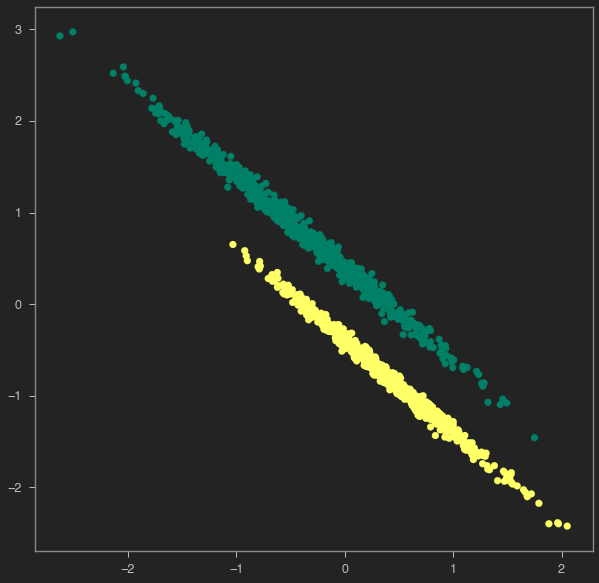

In [206]:
#Multiple
n=1500
X, y = datasets.make_blobs(n_samples=n, random_state=8,centers=2,cluster_std=[0.75,0.6])
plt.figure(figsize=(10,10))
X = StandardScaler().fit_transform(X)
transformation = [[0.6, -0.6],[-0.4, 0.8]]
X = np.dot(X, transformation)
plt.scatter(X[:,0],X[:,1],c=y,cmap = 'summer')

Covariance Matrix:
 [[ 0.49874423 -0.64804963]
 [-0.64804963  0.95746178]]
[[-0.81659105 -0.57721665]
 [ 0.57721665 -0.81659105]]
Max EigenValue: [ 0.57721665 -0.81659105]
[0.04066299 1.41554302]


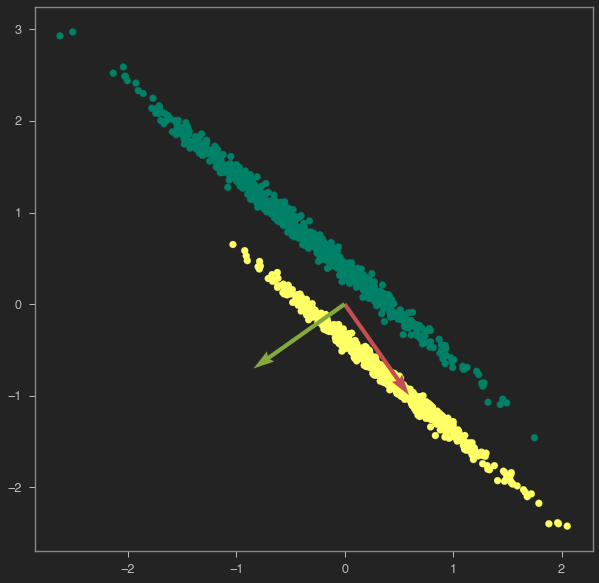

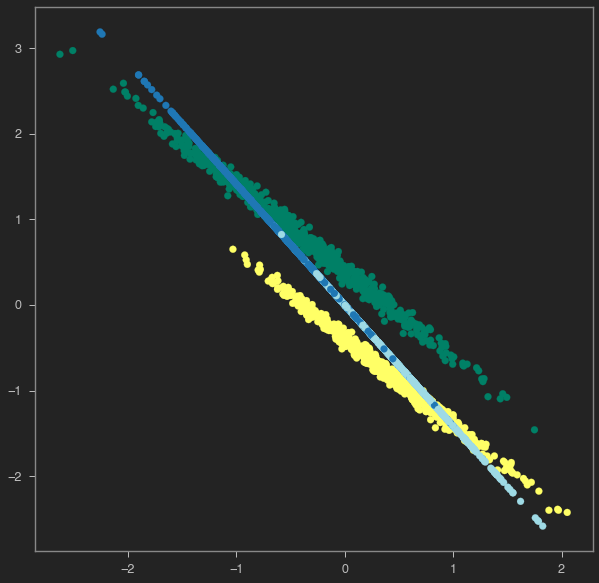

In [211]:
cov = np.cov(X.T)
print("Covariance Matrix:\n",cov)
eig_vals, eig_vecs = np.linalg.eig(cov)
eig_vecs = eig_vecs.T
eigen_values_sorted = np.argsort(eig_vals)
max_eig = eigen_values_sorted[1]
min_eig = eigen_values_sorted[0]
print(eig_vecs)
print("Max EigenValue:",eig_vecs[max_eig])
print(eig_vals)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.quiver([0,0],[0,0], eig_vecs[max_eig,:],eig_vecs[min_eig,:],color=['r','g'],scale=5)
#Projection
plt.figure(figsize=(10,10))
proj = np.dot(X,eig_vecs[max_eig,:])
proj = np.reshape(proj,(1500,1))
X_new = proj*eig_vecs[max_eig,:]
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.scatter(X_new[:,0],X_new[:,1],c=y,cmap="tab20")

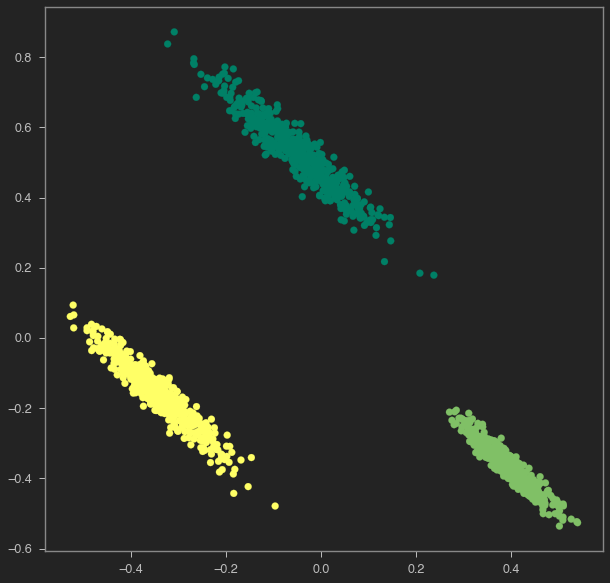

In [229]:
#Multiple
n=1500
X, y = datasets.make_blobs(n_samples=n, random_state=8,centers=3,cluster_std=[0.75,0.45,0.65])
plt.figure(figsize=(10,10))
X = StandardScaler().fit_transform(X)
transformation = [[0.6, -0.6],[-0.4, 0.8]]
X = np.dot(X, transformation)
plt.scatter(X[:,0],X[:,1],c=y,cmap = 'summer')

[array([-0.04778746,  0.52139766]), array([ 0.38974309, -0.3614591 ]), array([-0.34195563, -0.15993857])]
[[ 0.78471045  0.6198625 ]
 [-0.77800251  0.62826116]]
Max EigenValue: [0.78471045 0.6198625 ]
[233.76447099  12.50617533]


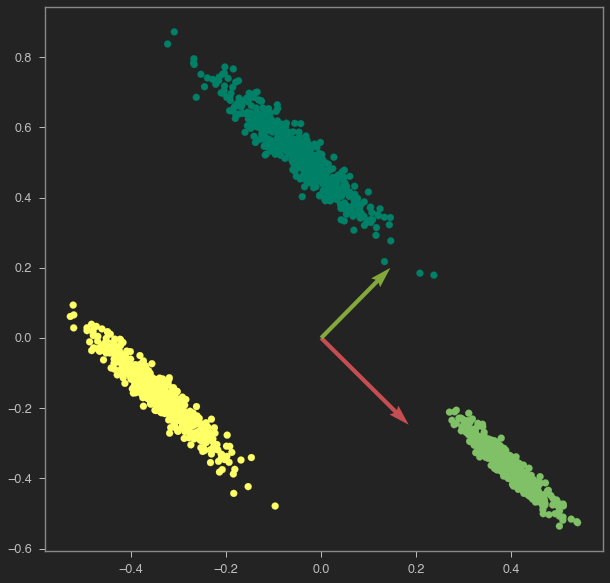

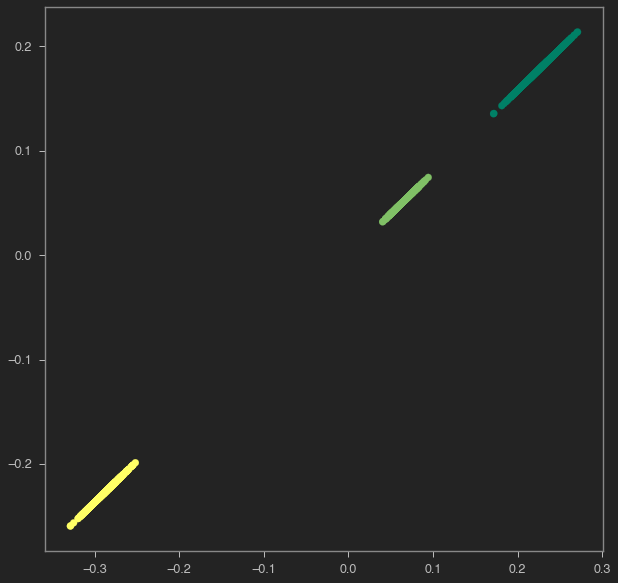

In [230]:
target_classes = np.unique(y)
 
mean_vectors = []
 
for cls in target_classes:
    mean_vectors.append(np.mean(X[y == cls], axis=0))
print(mean_vectors)
data_mean = np.mean(X, axis=0).reshape(1, X.shape[1])
B = np.zeros((X.shape[1], X.shape[1]))
for i, mean_vec in enumerate(mean_vectors):
    n = X[y == i].shape[0]
    mean_vec = mean_vec.reshape(1, X.shape[1])
    mu1_mu2 = mean_vec - data_mean
    B += n * np.dot(mu1_mu2.T, mu1_mu2)
s_matrix = []
 
for cls, mean in enumerate(mean_vectors):
    Si = np.zeros((X.shape[1], X.shape[1]))
    for row in X[y == cls]:
        t = (row - mean).reshape(1, X.shape[1])
        Si += np.dot(t.T, t)
    s_matrix.append(Si)
S = np.zeros((X.shape[1], X.shape[1]))
for s_i in s_matrix:
    S += s_i
S_inv = np.linalg.inv(S)
 
S_inv_B = S_inv.dot(B)
 
eig_vals, eig_vecs = np.linalg.eig(S_inv_B)
eig_vecs = eig_vecs.T
eigen_values_sorted = np.argsort(eig_vals)

max_eig = eigen_values_sorted[1]
min_eig = eigen_values_sorted[0]
print(eig_vecs)
print("Max EigenValue:",eig_vecs[max_eig])
print(eig_vals)
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.quiver([0,0],[0,0], eig_vecs[max_eig,:],eig_vecs[min_eig,:],color=['r','g'],scale=5)

#Projection
plt.figure(figsize=(10,10))
proj = np.dot(X,eig_vecs[max_eig,:])
proj = np.reshape(proj,(1500,1))
X_new = proj*eig_vecs[max_eig,:]
plt.scatter(X_new[:,0],X_new[:,1],c=y,cmap="summer")